# Мобильные приложения — Выделение групп пользователей на основе поведения

# Описание данных и условие задачи

<i>Датасет</i> `mobile_dataset.csv`

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.<br>

`event.time` — время совершения,<br>
`event.name` — название события,<br>
`user.id` — идентификатор пользователя.<br>
<br>

<i>Датасет</i> `mobile_sources.csv`

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.<br>

`userId` — идентификатор пользователя,<br>
`source` — источник, с которого пользователь установил приложение.<br>
<br>

<i>Расшифровки событий</i>

`advert_open` — открытие карточки объявления,<br>
`photos_show` — просмотр фотографий в объявлении,<br>
`tips_show` — пользователь увидел рекомендованные объявления,<br>
`tips_click` — пользователь кликнул по рекомендованному объявлению,<br>
`contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления,<br>
`contacts_call` — пользователь позвонил по номеру телефона на карточке объявления,<br>
`map` — пользователь открыл карту размещенных объявлений,<br>
`search_1` и `search_7` — разные события, связанные с поиском по сайту,<br>
`favorites_add` — добавление объявления в избранное,<br>
<br>
<br>
<b>Предстоит сделать:</b><br>
- провести исследовательский анализ данных<br>
- выделить группы пользователей, которые различаются по метрикам:
1. retention rate,
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.<br>
- сегментировать пользователей на основе действий<br>
- проверить статистические гипотезы<br>

# Ссылка на презентацию: https://drive.google.com/file/d/1P7cedMJDmfzpKI3kLEDufq4bMJ3C3y7a

# Ссылка на дашборд: https://public.tableau.com/views/mobile_app_16795059295480/MobileApps

# Декомпозиция проекта

- Шаг 1. Загрузка данных и подготовка их к анализу
- - 1.1. Файлы с данными и общая информация
- - 1.2. Обработка и очистка данных
- - Вывод Шаг 1
- Шаг 2. Функции для расчёта и анализа
- - 2.1. — для создания диаграмм
- - 2.2. — для создания горизонтального барчарта
- - 2.3. — для создания вертикального барчарта
- - 2.4. — для создания профилей пользователей
- - 2.5. — для подсчёта Retention Rate
- Шаг 3. Исследовательский анализ данных
- - Пользователи
- - - Профили пользователей
- - - Сколько всего пользователей
- - - Сколько в среднем событий приходится на пользователя
- - - Минимальная и максимальная дата привлечения пользователей
- - - Поведение пользователей
- - - - По Retention Rate
- - - - - По дням
- - - - - По источнику перехода
- - - - По времени, проведенном в приложении (по сессиям)
- - - - По частоте действий
- - - - По конверсии в целевое действие - просмотр контактов
- - События
- - - Последовательность событий и воронка пользователей
- - - Рекомендованные объявления
- - Каналы привлечения
- - Вывод Шаг 3
- Шаг 4. Сегментация пользователей
- - Момент и горизонт анализа данных
- - Retention Rate для сегментированных пользователей
- - Конверсия по сегментированным пользователям
- - Вывод Шаг 4
- Шаг 5. Проверка статистических гипотез
- - Конверсия пользователей, пришедших из yandex, отличается от пользователей, пришедших из google
- - Конверсия в целевое действие у пользователей с маленьким количеством сессий и большим количеством сессий отличается
- - Вывод Шаг 5
- Общий вывод и рекомендации

# Шаг 1. Загрузка данных и подготовка их к анализу

## Файлы с данными и общая информация

Импортирую библиотеки, загружаю данные о событиях и пользователях в соответствующие переменные

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import math as mth
import scipy.stats as st
from scipy.stats import ttest_ind
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from IPython.display import display
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None, 'display.max_rows', None)
colors = ['#b61f2e', '#dc6e57', '#f7b799', '#feebdf', '#ededed', '#c7c7c7', '#919191', '#535353']
sns.set(style='white', rc={'figure.figsize':(15, 12)})

try:
    mobile_dataset = pd.read_csv('/datasets/mobile_dataset.csv')
    mobile_sources =  pd.read_csv('/datasets/mobile_sources.csv')
except:
    mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
    mobile_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')

Просматриваю основную информацию о данных

In [2]:
def about_df(df):
    '''
    Основная информация о данных
    '''
    try:
        df.hist(color='darkred', figsize=(10, 4));
    except ValueError:
        print('Нечего вывести в график')
    return  [
            display(df.head()),
            display(df.info()),
            display(df.describe(datetime_is_numeric=True, include='all')),
            display(f'Дубликатов в датафрейме: {len(df) - len(df.drop_duplicates())}'),
            ]

In [3]:
about_df(mobile_dataset)

Нечего вывести в график


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


'Дубликатов в датафрейме: 0'

[None, None, None, None]

In [4]:
about_df(mobile_sources)

Нечего вывести в график


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

,userId,source
count,4293,4293
unique,4293,3
top,020292ab-89bc-4156-9acf-68bc2783f894,yandex
freq,1,1934


'Дубликатов в датафрейме: 0'

[None, None, None, None]

## Обработка и очистка данных

Переименовываю колонки таблиц, приводя их к змеиному регистру

In [5]:
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 
                       'event.name': 'event_name', 
                       'user.id': 'user_id'})

In [6]:
mobile_dataset.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

In [7]:
mobile_sources = mobile_sources.rename(columns={'userId': 'user_id'})

In [8]:
mobile_sources.columns

Index(['user_id', 'source'], dtype='object')

В таблицах mobile_dataset и mobile_sources пропуски и дубликаты отсутствуют

Перевожу столбец mobile_dataset.event_time в формат datetime

In [9]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

In [10]:
mobile_dataset['event_time'] = mobile_dataset['event_time'].dt.round('S')

In [11]:
mobile_dataset.sort_values(by='event_time').duplicated().sum()

1118

В данных выявлено 1118 дубликатов. 

In [12]:
100 - (len(mobile_dataset) - mobile_dataset.sort_values(by='event_time').duplicated().sum()) / len(mobile_dataset) * 100

1.506799466285699

Что составляет 1.5% от исходных данных.

Удаляю дубликаты

In [13]:
mobile_dataset = mobile_dataset.drop_duplicates()

В первой таблице - почти 75 тысяч строк, во второй - 4300. Принимаю решение объединить эти таблицы в одну для дальнейшего удобства. Применяю left join к первой таблице, присоединяя вторую по колонке user_id.

In [14]:
new_df = mobile_dataset.merge(mobile_sources, how='left', on='user_id')

Просматриваю типы событий

In [15]:
new_df.event_name.value_counts()

tips_show        39892
photos_show       9372
advert_open       6145
contacts_show     4302
map               3760
search_1          3489
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      538
search_3           521
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

События 'contacts_show' и 'show_contacts' явные дубликаты. Даю общее название 'contacts_show' и проверяю на дубликаты еще раз.

In [16]:
new_df = new_df.replace('show_contacts', 'contacts_show')

In [17]:
new_df.duplicated().sum()

0

Больше дубликатов нет.

События 'search_1' - 'search_7' объединяю в одно событие 'search'. Так как нет никаких признаков, делящих это событие. Для дальнейшего анализа достаточно одного объединенного события.

In [18]:
new_df = new_df.replace('search_1', 'search')
new_df = new_df.replace('search_2', 'search')
new_df = new_df.replace('search_3', 'search')
new_df = new_df.replace('search_4', 'search')
new_df = new_df.replace('search_5', 'search')
new_df = new_df.replace('search_6', 'search')
new_df = new_df.replace('search_7', 'search')

In [19]:
new_df.duplicated().sum()

72

Появилось 72 дубликата.

In [20]:
100 - (len(mobile_dataset) - new_df.duplicated().sum()) / len(mobile_dataset) * 100

0.09852351564745732

Что составляет 0.1% от исходных данных.

Удаляю дубликаты.

Добавляю столбец с датой события

In [21]:
new_df['event_dt'] = new_df['event_time'].dt.date

Добавляю второй столбец с датой для последующих вычислений.

In [22]:
new_df['event_time_2'] = new_df['event_time']

Меняю порядок столбцов

In [23]:
new_df = new_df[['user_id', 'event_dt', 'event_time', 'event_time_2', 'event_name', 'source']]

,user_id,event_dt,event_time,event_time_2,event_name,source
0,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:00,2019-10-07 00:00:00,advert_open,other
1,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:01,2019-10-07 00:00:01,tips_show,other
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2019-10-07 00:00:02,2019-10-07 00:00:02,tips_show,yandex
3,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:07,2019-10-07 00:00:07,tips_show,other
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2019-10-07 00:00:56,2019-10-07 00:00:56,advert_open,yandex


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 0 to 73078
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       73079 non-null  object        
 1   event_dt      73079 non-null  object        
 2   event_time    73079 non-null  datetime64[ns]
 3   event_time_2  73079 non-null  datetime64[ns]
 4   event_name    73079 non-null  object        
 5   source        73079 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 3.9+ MB


None

,user_id,event_dt,event_time,event_time_2,event_name,source
count,73079,73079,73079,73079,73079,73079
unique,4293,28,NaN,NaN,9,3
top,cb36854f-570a-41f4-baa8-36680b396370,2019-10-23,NaN,NaN,tips_show,yandex
freq,472,3252,NaN,NaN,39892,33854
mean,NaN,NaN,2019-10-21 15:37:20.732933120,2019-10-21 15:37:20.732933120,NaN,NaN
min,NaN,NaN,2019-10-07 00:00:00,2019-10-07 00:00:00,NaN,NaN
25%,NaN,NaN,2019-10-14 21:57:48,2019-10-14 21:57:48,NaN,NaN
50%,NaN,NaN,2019-10-22 00:21:50,2019-10-22 00:21:50,NaN,NaN
75%,NaN,NaN,2019-10-28 12:52:27.500000,2019-10-28 12:52:27.500000,NaN,NaN
max,NaN,NaN,2019-11-03 23:58:13,2019-11-03 23:58:13,NaN,NaN


'Дубликатов в датафрейме: 72'

[None, None, None, None]

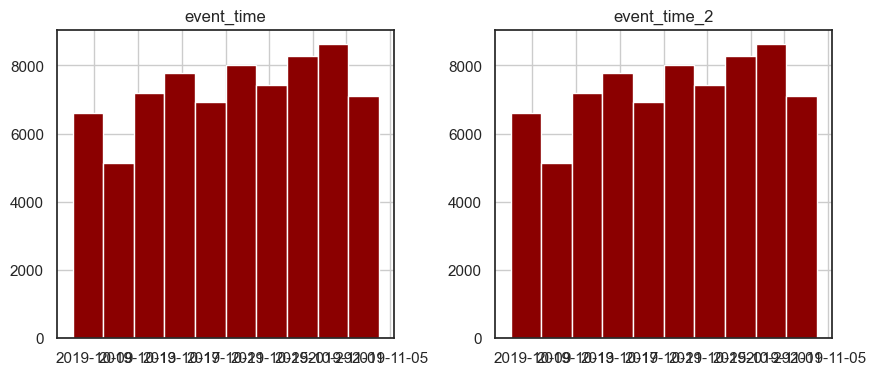

In [24]:
about_df(new_df)

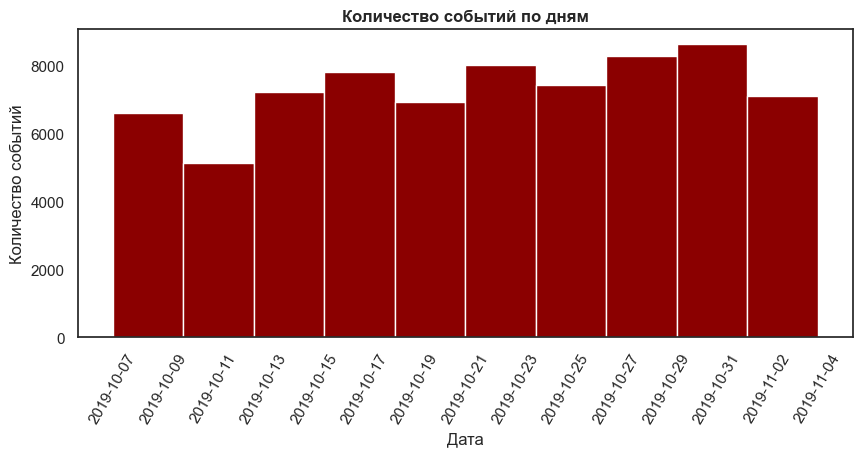

In [25]:
sns.set(style='white', rc={'figure.figsize':(25, 15)})

new_df.hist(column='event_time', color='darkred', figsize=(10, 4), bins=10)

plt.grid(False)
plt.xticks(np.arange(new_df.event_time.value_counts().index.date.min(),
                     new_df.event_time.value_counts().index.date.max() + dt.timedelta(days=2),
                     dt.timedelta(days=2)),
          rotation=60)
plt.title('Количество событий по дням', weight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show();

## Вывод Шаг 1

В исходных данных не было пропусков. Дубликатов было 1190 строк, что составляет 1.6% от исходного датасета.<br>

Типы данных дат перевела в формат дат.<br>

Минимальная дата события - `07 октября 2019 года`, максимальная дата события - `03 ноября 2019 года`.<br>

Самый популярный событие - `tips_show`.<br>
Самый активный пользователь - `cb36854f-570a-41f4-baa8-36680b396370`.<br>
Самый популярный источник - `yandex`.<br>

По графику `event_time` можно сказать, что количество событий имело плавный рост на протяжении всего времени.<br>

# Шаг 2. Функции для расчёта и анализа

## `plot_pie()` — для создания диаграмм

In [26]:
def plot_pie(column, title):
    '''
    Функция, которая рисует диаграмму. 
    Принимает на вход данные и наименование диаграммы.
    '''
    plt.rcParams["figure.figsize"] = (10, 6)
    column.plot(kind='pie',
        autopct='%1.0f%%',  
        legend=False, 
        ylabel='', 
        colors=colors,
        fontsize=12)
    plt.title(title, weight='bold', fontsize=20, y=1.05, ha='center')
    plt.show();

## `plot_bar_hor()` — для создания горизонтального барчарта

In [27]:
def plot_bar_hor(df, x, y, title):
    '''
    Функция, которая рисует горизонтальный барчарт с подписями. 
    Принимает на вход датафрейм, количественную колонку, категориальную колонку и наименование диаграммы.
    '''
    ax = sns.barplot(x = x,
            y = y,
            data = df,
            palette='RdGy',
            orient='h',
            saturation=1)
    sns.despine(bottom=True, left=True) 
    ax.set_title(title, weight='bold', fontsize=20, y=1.05)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.bar_label(ax.containers[0], fmt='%d', fontsize=12, padding=5)
    plt.xticks([])
    plt.show()

## `plot_bar_vert()` — для создания вертикального барчарта

In [28]:
def plot_bar_vert(df, x, y, title, xlabel):
    '''
    Функция, которая рисует вертикальный барчарт с подписями. 
    Принимает на вход датафрейм, количественную колонку, категориальную колонку и наименование диаграммы.
    '''
    ax = sns.barplot(x = x,
            y = y,
            data = df,
            palette='RdGy',
            saturation=1)
    sns.despine(bottom=True, left=True) 
    ax.set_title(title, weight='bold', fontsize=20, y=1.05)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')
    ax.bar_label(ax.containers[0], fmt='%d', fontsize=12, padding=5)
    plt.yticks([])
    plt.show()

## `get_profiles()` — для создания профилей пользователей

In [29]:
def get_profiles(df):
    '''
    Функция для создания пользовательских профилей
    '''
    # находим параметры первых посещений
    profiles = (
        df.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg(
            {
                'event_time': 'first',
                'event_time_2': 'last',
                'event_name': 'first',
                'source': 'first',
            }
        )
        .rename(columns={'event_time': 'first_ts',
                        'event_time_2': 'last_ts'})
        .reset_index()
    )

    # определяем дату первого и последнего посещения
    # и первый день месяца, в который это посещение произошло
    profiles['first_dt'] = profiles['first_ts'].dt.date
    #profiles['month'] = profiles['first_ts'].dt.month
    profiles['last_dt'] = profiles['last_ts'].dt.date
    #profiles['month'] = profiles['first_ts'].dt.month

    return profiles

## `get_retention()` — для подсчёта Retention Rate

In [30]:
def get_retention(
    profiles, 
    events, 
    observation_date, 
    horizon_days):
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = profiles.merge(
        events[['user_id', 'event_time']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    result_raw['event_dt'] = result_raw['event_time'].dt.date

    result_grouped = result_raw.pivot_table(
        index=['first_dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )  # строим таблицу удержания

    cohort_sizes = (
        result_raw.groupby('first_dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )  # вычисляем размеры когорт

    result_grouped = cohort_sizes.merge(
        result_grouped, on='first_dt', how='left'
    ).fillna(0)  # объединяем размеры когорт и таблицу удержания

    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем из результата все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))]

    # во время деления все значения cohort_size превратились в единицу
    # восстанавливаем — они понадобятся нам позже
    result_grouped['cohort_size'] = cohort_sizes

    return result_raw, result_grouped

In [31]:
def get_retention_with_dim(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[]
):
    '''
    Функция для расчёта удержания
    '''

    # собираем «сырые» данные для расчёта удержания
    result_raw = profiles.merge(
        sessions[['user_id', 'event_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['event_time'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# Шаг 3. Исследовательский анализ данных

## События

Изучаю события пользователей

In [32]:
events = new_df.groupby('event_name') \
                        .agg({'event_name': 'count',
                             'user_id': 'nunique'}) \
                        .rename(columns={'event_name':'all_users',
                                        'user_id': 'uniq_users'})
    
events['share'] = events['uniq_users'] / sum(events['uniq_users'])
events['share, %'] = round(events['uniq_users'] / sum(events['uniq_users']) * 100, 2)

events = events.sort_values(by='share', ascending=False).reset_index()

In [33]:
profiles = get_profiles(new_df)

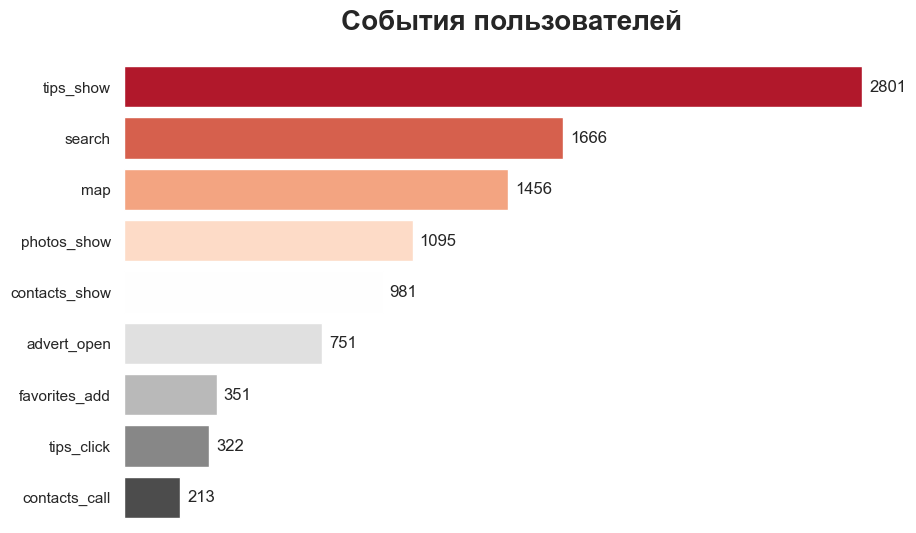

In [34]:
sns.set(style='white', rc={'figure.figsize':(10, 6)})

plot_bar_hor(events.sort_values(by='share', ascending=False),
                    'uniq_users',
                    'event_name',
                    'События пользователей')

Самое частое событие: `tips_show`.

Последовательность событий, вероятно, следующая:
    
- `search` — разные события, связанные с поиском по сайту
- `map` — пользователь открыл карту размещенных объявлений
- `photos_show` — просмотр фотографий в объявлении
- `contacts_show` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления

### Рекомендованные объявления

Изучаю конверсию в нажатие на рекомендованные объявления

In [35]:
def conversion_target(df, profiles, target):
    '''
    Функция, которая считает конверсию пользователей в указанное событие
    '''
    events = df.groupby('event_name') \
                        .agg({'event_name': 'count',
                             'user_id': 'nunique'}) \
                        .rename(columns={'event_name':'all_users',
                                        'user_id': 'uniq_users'})
    
    events['share'] = events['uniq_users'] / len(profiles)
    events['share, %'] = round(events['uniq_users'] / len(profiles) * 100, 2)
    
    events = events.sort_values(by='share', ascending=False).reset_index()

    return events.query('event_name == @target')['share, %']

In [36]:
conversion_target(new_df, profiles, 'tips_click')

7    7.5
Name: share, %, dtype: float64

По рекомендованным объявлениям кликает 7.5% пользователей.

## Пользователи

### Профили пользователей

In [37]:
display(profiles.head()) 

,user_id,first_ts,last_ts,event_name,source,first_dt,last_dt
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-22 11:30:53,tips_show,other,2019-10-07,2019-10-22
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34,2019-11-03 17:12:10,search,yandex,2019-10-19,2019-11-03
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,2019-11-01 14:19:18,photos_show,yandex,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06,2019-10-31 21:42:16,search,google,2019-10-18,2019-10-31
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,2019-10-29 02:17:12,contacts_show,yandex,2019-10-25,2019-10-29


In [38]:
display(profiles.describe(datetime_is_numeric=True, include='all'))

,user_id,first_ts,last_ts,event_name,source,first_dt,last_dt
count,4293,4293,4293,4293,4293,4293,4293
unique,4293,NaN,NaN,8,3,28,28
top,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,NaN,NaN,tips_show,yandex,2019-10-07,2019-11-03
freq,1,NaN,NaN,1398,1934,204,285
mean,NaN,2019-10-20 07:58:03.116002816,2019-10-22 23:12:22.015373824,NaN,NaN,NaN,NaN
min,NaN,2019-10-07 00:00:00,2019-10-07 00:18:43,NaN,NaN,NaN,NaN
25%,NaN,2019-10-13 17:26:10,2019-10-16 11:13:34,NaN,NaN,NaN,NaN
50%,NaN,2019-10-19 22:57:28,2019-10-23 16:44:53,NaN,NaN,NaN,NaN
75%,NaN,2019-10-26 20:20:23,2019-10-29 22:11:20,NaN,NaN,NaN,NaN
max,NaN,2019-11-03 23:46:47,2019-11-03 23:58:13,NaN,NaN,NaN,NaN


Первое посещение - `2019-10-07 00:00:00`. Последнее посещение - `2019-11-03 23:46:47`<br>
Самое популярное событие - `tips_show`.<br>
Самый популярный канал привлечения - `yandex`.<br>

### Сколько всего пользователей

In [39]:
profiles.groupby('user_id').agg({'user_id' : 'nunique'}).count()

user_id    4293
dtype: int64

Всего пользователей - 4293.

### Сколько в среднем событий приходится на пользователя

In [40]:
new_df.groupby('user_id').agg({'user_id' : 'nunique', 'event_name': 'count'}).mean()

user_id        1.000000
event_name    17.022828
dtype: float64

В среднем на пользователя приходится 17 событий.

### Минимальная и максимальная дата привлечения пользователей

Определяю минимальную и максимальную даты привлечения пользователей.<br>

In [41]:
min_date = profiles.first_ts.min()
min_date

Timestamp('2019-10-07 00:00:00')

In [42]:
max_date = profiles.last_ts.max()
max_date

Timestamp('2019-11-03 23:58:13')

Первое посещение - `2019-10-07 00:00:00`. Последнее посещение - `2019-11-03 23:58:13`.

### Момент и горизонт анализа данных

Установим момент и горизонт анализа данных. Предположим, что на календаре 4 ноября 2019 года, и зададим недельный горизонт анализа.

In [43]:
observation_date = datetime(2019, 11, 4).date()
horizon_days = 7

### Поведение пользователей

#### По Retention Rate

##### По дням

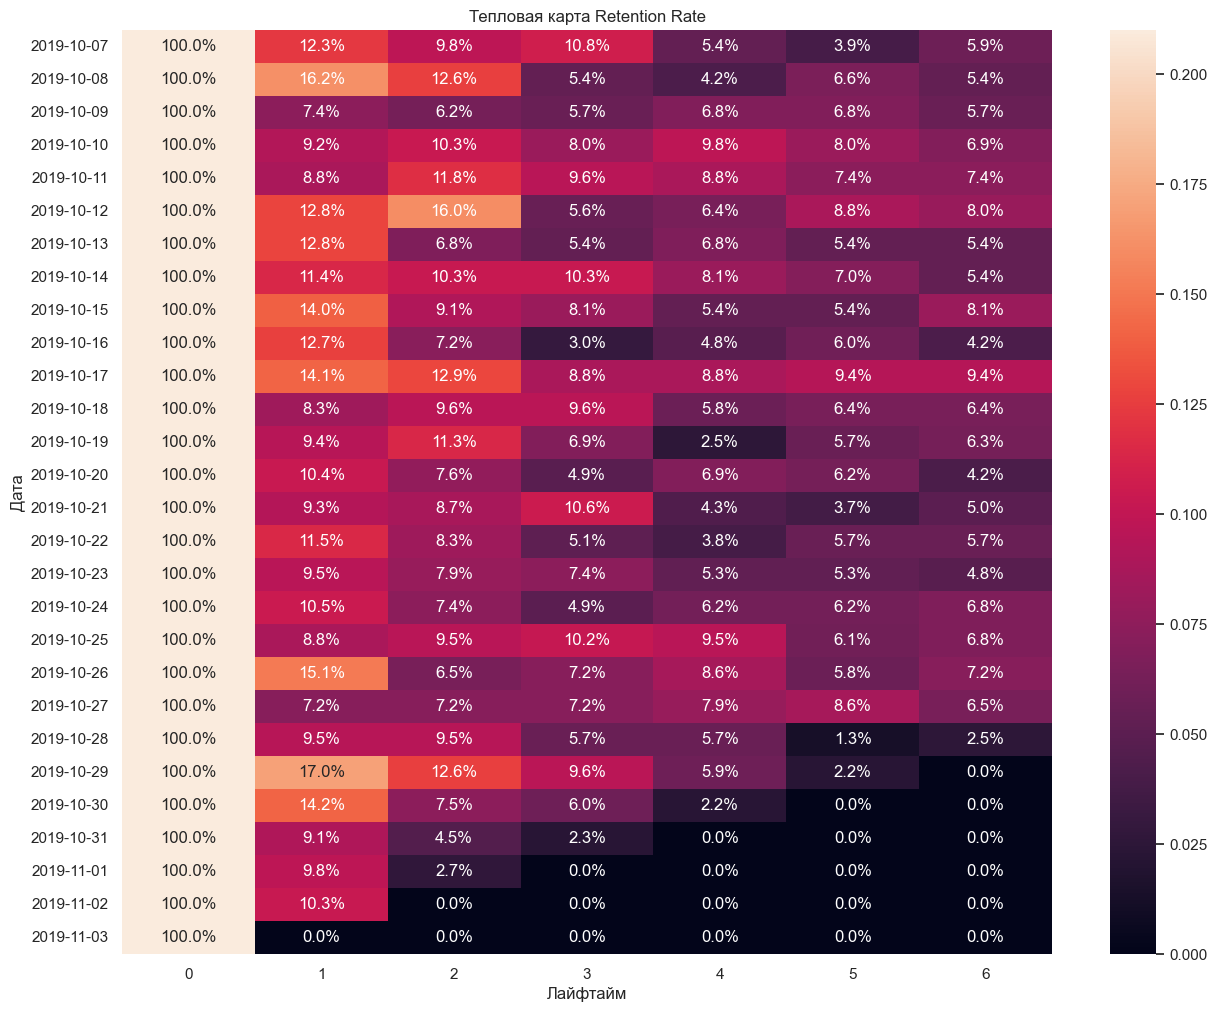

In [44]:
retention_raw, retention = get_retention(
    profiles, new_df, observation_date, horizon_days
)

sns.set(style='white', rc={'figure.figsize':(15, 12)})

sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '0.1%', # отображаем значения в виде процентов
            vmax = +0.21
           )

plt.title('Тепловая карта Retention Rate')  # название графика
plt.ylabel('Дата')
plt.xlabel('Лайфтайм')
plt.show();

Retention Rate на 7-й день для всех пользователей составляет от 0 до 9.4%

На протяжении всего периода дни различаются по удержанию пользователей. Самые лучший день по удержанию - 17.10.2019.
Можно предположить, что в этот день проводилась хорошая рекламная кампания.

##### По источнику перехода

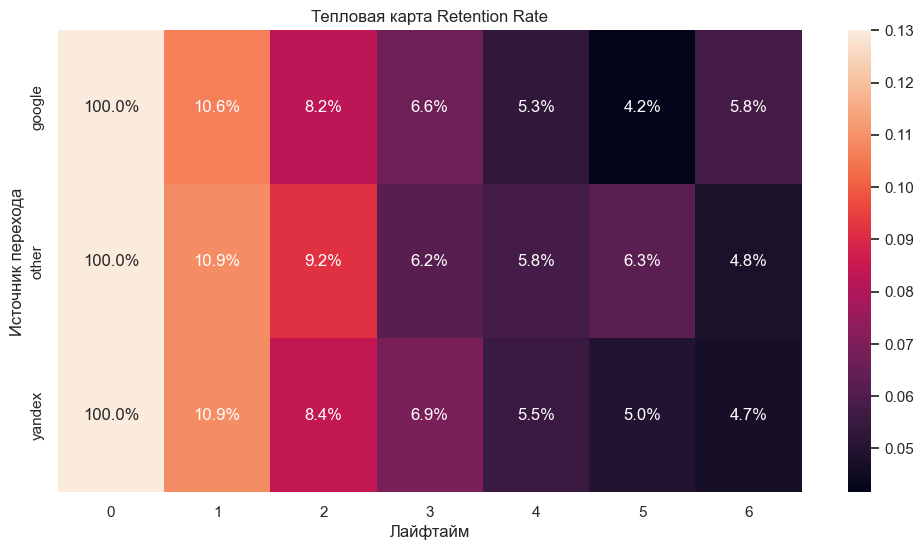

In [45]:
retention_raw_with_dim, retention_with_dim, retention_history_with_dim = get_retention_with_dim(
    profiles, new_df, observation_date, horizon_days, dimensions=['source']
)

sns.set(style='white', rc={'figure.figsize':(12, 6)})

sns.heatmap(retention_with_dim.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '0.1%', # отображаем значения в виде процентов
            vmax = +0.13
           )

plt.title('Тепловая карта Retention Rate')  # название графика
plt.ylabel('Источник перехода')
plt.xlabel('Лайфтайм')
plt.show();

Самый высокий показатель удержания пользователей у тех, кто пришел из google, - на 7-й день составляет 5.8% против 4.7%-4.8% у yandex и other

#### По времени, проведенном в приложении (по сессиям)

Для расчета времени, проведенного пользователями в приложении, из событий выделю сессии: 30 мин. Полчаса - это оптимальный вариант, так как время меньшее может означать, что пользователь отвлекся от приложения, а затем снова вернулся, чтобы завершить поиск товаров. Время более получаса - это завершение предыдущей сессии и возврат в приложение с целью поиска новых товаров.

In [46]:
g = (new_df.sort_values(['user_id', 'event_time']).groupby('user_id')['event_time'].diff() > dt.timedelta(minutes=30)).cumsum()

new_df['session_id'] = new_df.sort_values(['user_id', 'event_time']).groupby(['user_id', g], sort=False).ngroup() + 1

new_df.head()

,user_id,event_dt,event_time,event_time_2,event_name,source,session_id
0,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:00,2019-10-07 00:00:00,advert_open,other,71
1,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:01,2019-10-07 00:00:01,tips_show,other,71
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2019-10-07 00:00:02,2019-10-07 00:00:02,tips_show,yandex,8393
3,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:07,2019-10-07 00:00:07,tips_show,other,71
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2019-10-07 00:00:56,2019-10-07 00:00:56,advert_open,yandex,8393


In [47]:
summ_sessions = new_df.groupby('user_id') \
                    .agg({'session_id': 'nunique'}) \
                    .sort_values(by='session_id', ascending=False) \
                    .rename(columns={'session_id': 'summ_sessions'})
summ_sessions.head()

,summ_sessions
user_id,
21230dd9-2f7f-4b77-a436-43d4d10388e0,99
1580911b-65db-4f1a-be7e-1ca39becac30,52
cb36854f-570a-41f4-baa8-36680b396370,50
6383ff6a-04b8-4562-a98f-bb4f760d3c39,45
e13f9f32-7ae3-4204-8d60-898db040bcfc,38


In [48]:
summ_sessions.describe()

,summ_sessions
count,4293.000000
mean,2.415094
std,3.536466
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,99.000000


Минимальное значение сессий - 1. Максимальное значение - 99. Среднее - 2, медианное - 1.

Строю гистограмму

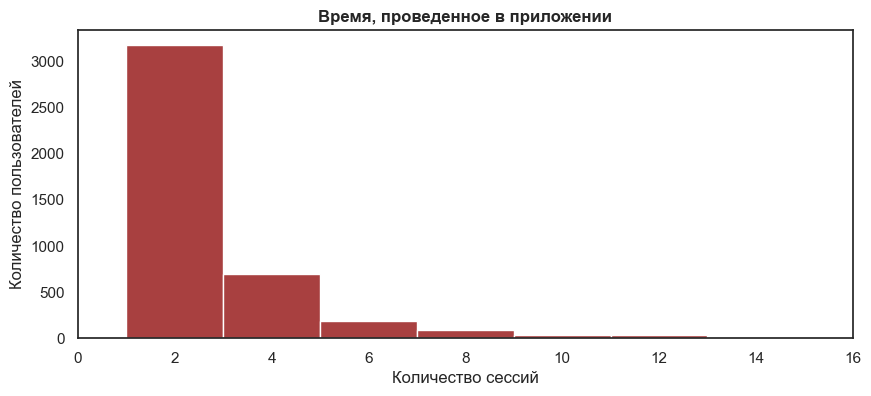

In [49]:
sns.set(style='white', rc={'figure.figsize':(10, 4)})

sns.histplot(data=summ_sessions, x='summ_sessions', binwidth=2, color='darkred')

plt.title('Время, проведенное в приложении', weight='bold')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество сессий')
plt.xlim(0, 16)
plt.show();

Построю боксплот, убрав выбросы

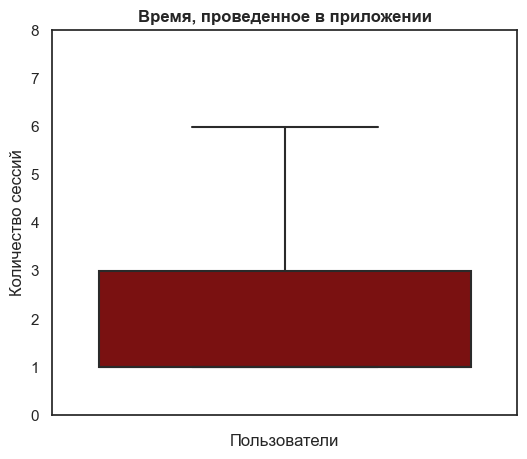

In [50]:
sns.set(style='white', rc={'figure.figsize':(6, 5)})

sns.boxplot(data=summ_sessions, y='summ_sessions', showfliers=False, color='darkred')

plt.title('Время, проведенное в приложении', weight='bold')
plt.ylabel('Количество сессий')
plt.xlabel('Пользователи')
plt.ylim(0, 8)
plt.show();

#### По частоте действий

In [51]:
new_df.head()

,user_id,event_dt,event_time,event_time_2,event_name,source,session_id
0,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:00,2019-10-07 00:00:00,advert_open,other,71
1,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:01,2019-10-07 00:00:01,tips_show,other,71
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2019-10-07 00:00:02,2019-10-07 00:00:02,tips_show,yandex,8393
3,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,2019-10-07 00:00:07,2019-10-07 00:00:07,tips_show,other,71
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2019-10-07 00:00:56,2019-10-07 00:00:56,advert_open,yandex,8393


In [52]:
summ_events = new_df.groupby(['user_id',  'event_dt', 'source']) \
                    .agg({'event_name': 'count'}) \
                    .sort_values(by='event_dt', ascending=True) \
                    .reset_index()

summ_events.head()

,user_id,event_dt,source,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,9
1,f0290ab2-e1af-47fb-9ee8-56144d72eeee,2019-10-07,yandex,21
2,c2cf55c0-95f7-4269-896c-931d14deaab5,2019-10-07,google,24
3,8904521f-8dff-4967-8bd0-18cce4c3d289,2019-10-07,google,38
4,be95e2a4-50e3-4763-bc00-1758848d2641,2019-10-07,google,4


In [53]:
summ_events.describe()

,event_name
count,7817.000000
mean,9.348727
std,12.359659
min,1.000000
25%,3.000000
50%,6.000000
75%,11.000000
max,384.000000


Минимальное количество действий - 1. Максимальное значение - 384. Среднее - 9, медианное - 6.

Построю боксплот, убрав выбросы

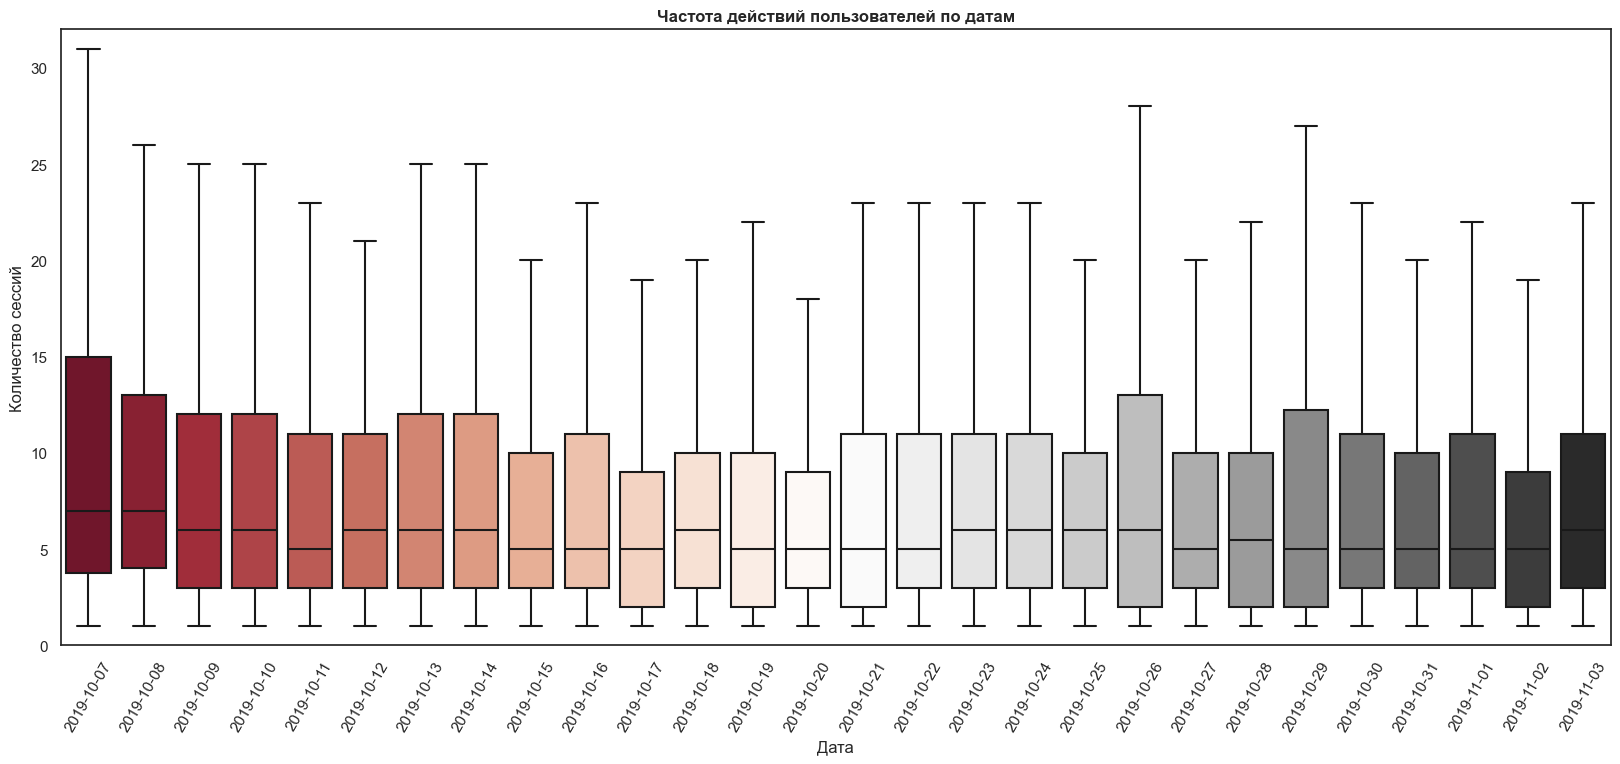

In [54]:
sns.set(style='white', rc={'figure.figsize':(20, 8)})

sns.boxplot(data=summ_events, y='event_name', x='event_dt', showfliers=False, palette='RdGy')

plt.title('Частота действий пользователей по датам', weight='bold')
plt.ylabel('Количество сессий')
plt.xlabel('Дата')
plt.ylim(0, 32)
plt.xticks(rotation=60)
plt.show();

In [55]:
# computing a 7 day rolling average
summ_events['7day_rolling_avg'] = summ_events.event_name.rolling(7).mean()

# viewing the dataset
display(summ_events.head(10))

,user_id,event_dt,source,event_name,7day_rolling_avg
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,9,NaN
1,f0290ab2-e1af-47fb-9ee8-56144d72eeee,2019-10-07,yandex,21,NaN
2,c2cf55c0-95f7-4269-896c-931d14deaab5,2019-10-07,google,24,NaN
3,8904521f-8dff-4967-8bd0-18cce4c3d289,2019-10-07,google,38,NaN
4,be95e2a4-50e3-4763-bc00-1758848d2641,2019-10-07,google,4,NaN
5,af9f4d75-530c-40f9-9aab-a5535b84845e,2019-10-07,other,14,NaN
6,6d5f7d73-51f0-42d6-bd4d-6d205342e5f3,2019-10-07,yandex,1,15.857143
7,95a6dc88-4824-4b54-a593-9d7d7b8b3e55,2019-10-07,yandex,2,14.857143
8,18b187f3-2571-44ea-a792-6e68a485b8ad,2019-10-07,yandex,6,12.714286
9,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex,25,12.857143


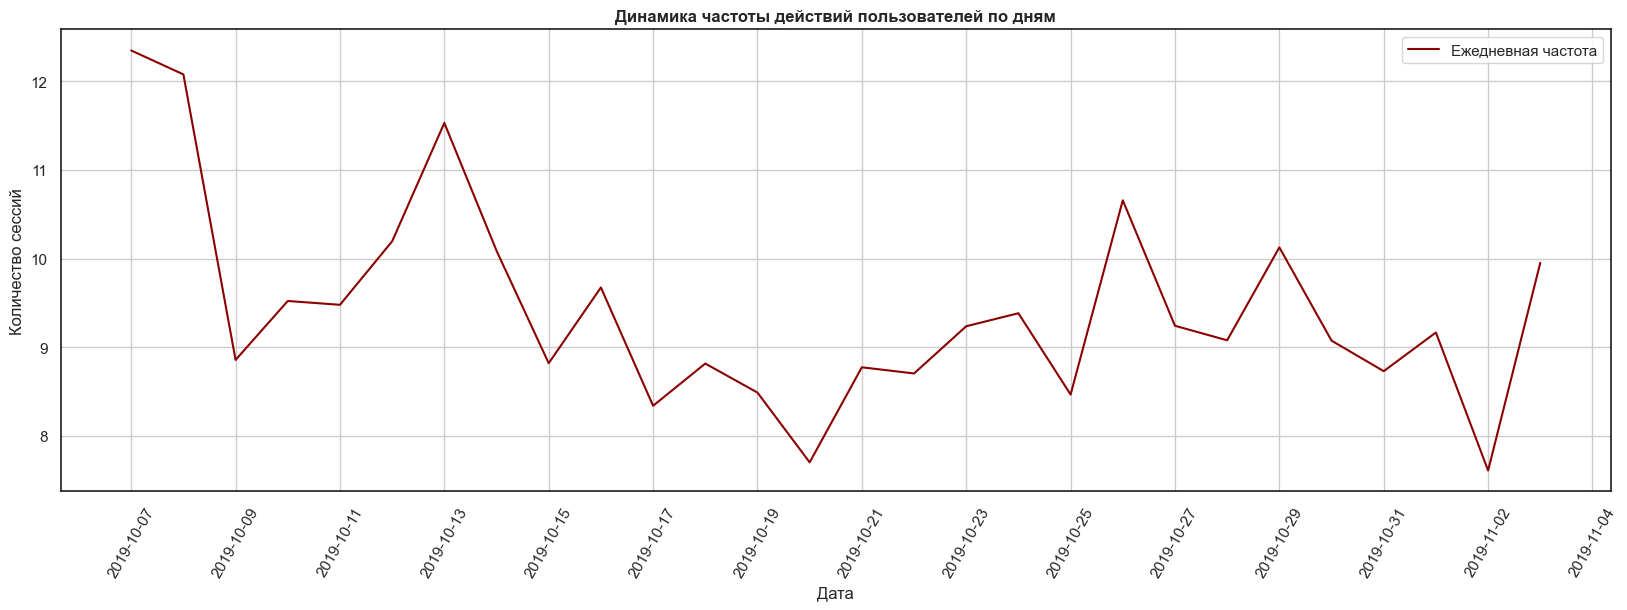

In [56]:
sns.set(style='white', rc={'figure.figsize':(20, 6)})

sns.lineplot(data=summ_events, y='event_name', x='event_dt', errorbar=None, color='darkred', label='Ежедневная частота')

plt.grid(True)
plt.title('Динамика частоты действий пользователей по дням', weight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.xticks(np.arange(summ_events.event_dt.value_counts().index.min(),
                     summ_events.event_dt.value_counts().index.max() + dt.timedelta(days=2),
                     dt.timedelta(days=2)),
          rotation=60)
plt.show();

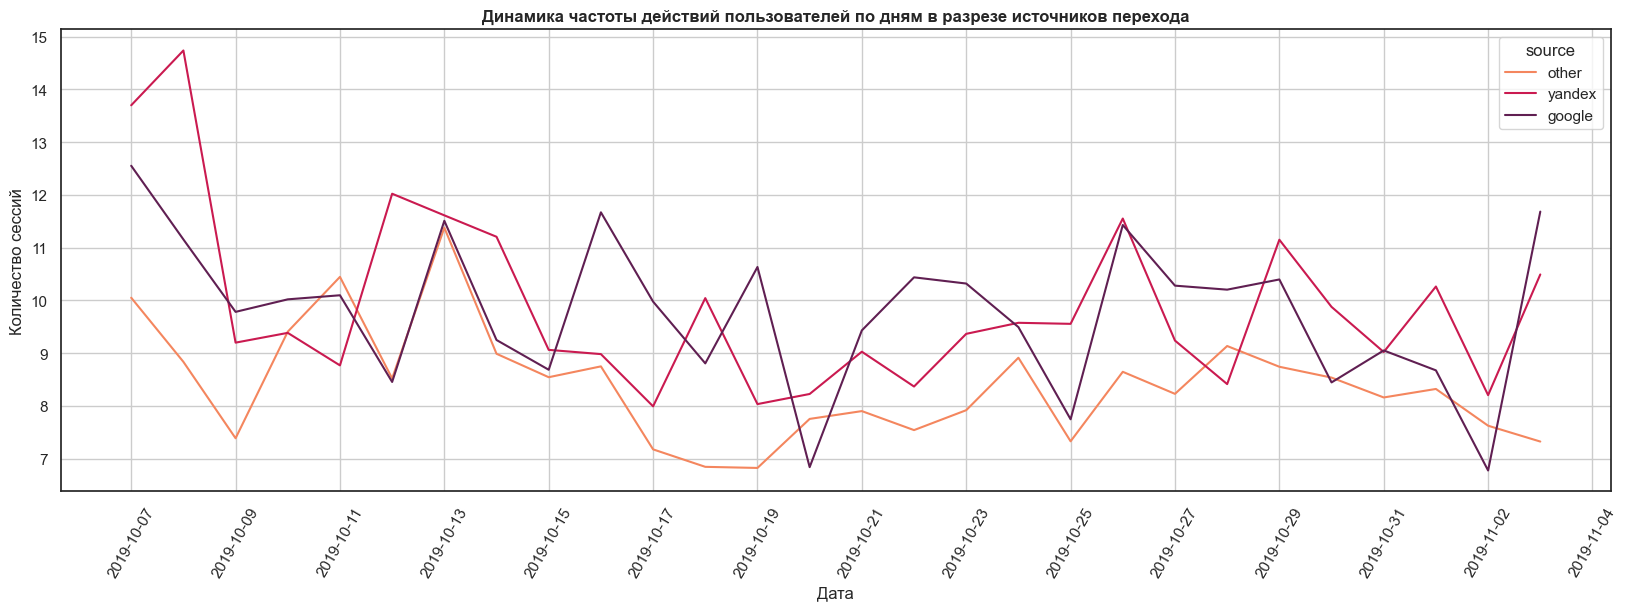

In [57]:
sns.set(style='white', rc={'figure.figsize':(20, 6)})

sns.lineplot(data=summ_events, y='event_name', x='event_dt', hue='source', errorbar=None, palette='rocket_r')

plt.grid(True)
plt.title('Динамика частоты действий пользователей по дням в разрезе источников перехода', weight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.xticks(np.arange(summ_events.event_dt.value_counts().index.min(),
                     summ_events.event_dt.value_counts().index.max() + dt.timedelta(days=2),
                     dt.timedelta(days=2)),
          rotation=60)
plt.show();

Пользователи с источником перехода yandex и google чаще совершают действия в приложении, чем из источника other.<br>
В некоторые дни пользователи из yandex были более активны, чем из google. И наоборот.<br>
Скорее всего, это зависило от рекламы в тот день.<br>
Например, 16 октября была активна реклама в google, а 12 октября - в yandex.<br>

#### По конверсии в целевое действие - просмотр контактов

In [58]:
conversion_target(new_df, profiles, 'contacts_show')

4    22.85
Name: share, %, dtype: float64

До `contacts_show` доходят 22.85%, дальнейший путь пользователя может продолжаться не в приложении, звонки могут исходить и вне. Так что конечный пункт считаю показом контактов продавца. 

## Каналы привлечения

Изучаю источники привлечения

In [59]:
profiles.source.value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

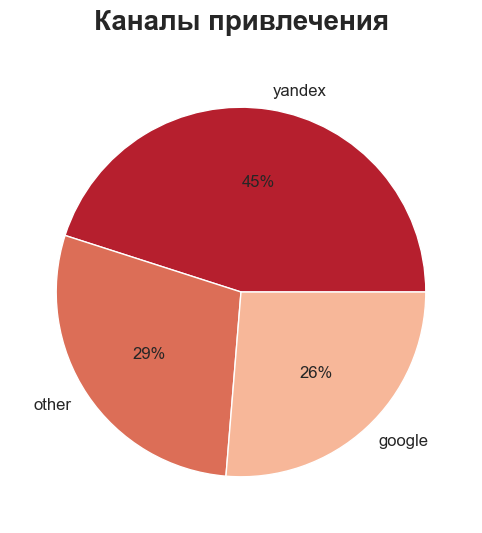

In [60]:
plot_pie(profiles.source.value_counts().head(), 'Каналы привлечения')

45% пользователей установили приложение из yandex, 26% - из google и 29% - из других источников.

## Вывод Шаг 3

Первое посещение - `2019-10-07 00:00:00`. Последнее посещение - `2019-11-03 23:58:13`.<br>
Самое популярное событие - `tips_show`.<br>
Самый популярный источник перехода в приложение - `yandex`.<br>

Всего пользователей - `4293`.<br>
В среднем на пользователя приходится `17 событий`.<br>

На протяжении всего периода дни различаются по удержанию пользователей. Самый лучший день по удержанию - `17.10.2019`. Можно предположить, что в этот день проводилась хорошая рекламная кампания.<br>

Самый высокий показатель удержания пользователей у тех, кто пришел из `google`.<br>
При этом 45% пользователей установили приложение из yandex, 26% - из google и 29% - из других источников.<br>

До целевого действия `contacts_show` доходят `22.85%`, дальнейший путь пользователя может продолжаться не в приложении, звонки могут исходить и вне. Так что конечный пункт считаю показом контактов продавца.<br>
    
По рекомендованным объявлениям `tips_click` кликает `7.5%` пользователей.<br>

# Шаг 4. Сегментация пользователей

Для дальнейшего исследования выделю три сегмента пользователей по количеству сессий в приложении.<br>
Делить буду по количеству проведенных сессий в приложении: редкие пользователи, средние и частые.<br>
Предполагаю, что пользователям, у которых больше сессий, приложение нравится, они чаще совершают целевое действие.<br>
Такое деление поможет понять, на какую группу пользователей стоит настраивать пуш-уведомления, чтобы они чаще заходили в приложение.<br>

Смотрю разлет значений в суммарных сессиях по пользователям.

In [61]:
summ_sessions.describe()

,summ_sessions
count,4293.000000
mean,2.415094
std,3.536466
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,99.000000


Среднее значение - 2 сессии на пользователя. При этом медианное значение - 1.

Поделю пользователей на сегменты по количеству проведенных в приложении сессий:
`rare`, `medium`, `well_done`.
Что будет соответствовать 25, 50 и 75 квартилям.

In [62]:
def segmentation(df):
    '''
    Функция для сегментации пользователей
    '''

    if df['summ_sessions'] <= 2:
        return 'rare'
    elif df['summ_sessions'] > 2 and df['summ_sessions'] <= 3:
        return 'medium'
    elif df['summ_sessions'] > 3:
        return 'well_done'

In [63]:
summ_sessions['segment'] = summ_sessions.apply(segmentation, axis = 1) 
summ_sessions.head()

,summ_sessions,segment
user_id,,
21230dd9-2f7f-4b77-a436-43d4d10388e0,99,well_done
1580911b-65db-4f1a-be7e-1ca39becac30,52,well_done
cb36854f-570a-41f4-baa8-36680b396370,50,well_done
6383ff6a-04b8-4562-a98f-bb4f760d3c39,45,well_done
e13f9f32-7ae3-4204-8d60-898db040bcfc,38,well_done


In [64]:
summ_sessions.segment.value_counts()

rare         3178
well_done     653
medium        462
Name: segment, dtype: int64

Получилось три сегмента пользователей:
- `rare` (редкие) 3178 пользователей
- `medium` (средние) 653 пользователей
- `well_done` (частые) 462 пользователя

Добавлю данную сегментацию к основной таблице данных и к таблице профилей пользователей

In [65]:
new_df = new_df.merge(summ_sessions, on='user_id', how='left')
profiles = profiles.merge(summ_sessions, on='user_id', how='left')

Выделю в отдельные таблицы пользователей в зависимости от сегмента.

In [66]:
df_rare = new_df.query('segment == "rare"')
df_medium = new_df.query('segment == "medium"')
df_well_done = new_df.query('segment == "well_done"')

In [67]:
profiles_rare = profiles.query('segment == "rare"')
profiles_medium = profiles.query('segment == "medium"')
profiles_well_done = profiles.query('segment == "well_done"')

### Retention Rate для сегментированных пользователей

In [68]:
def retention_rate_heatmap(profiles, df):
    retention_raw, retention = get_retention(
        profiles, df, observation_date, horizon_days
    )
    
    sns.set(style='white', rc={'figure.figsize':(14, 10)})
    sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
                annot = True,  # включаем подписи
                fmt = '0.1%', # отображаем значения в виде процентов
                vmax = +0.4
               )
    plt.title(f'Тепловая карта Retention Rate для пользователей сегмента {df.segment.iloc[0]}', weight='bold')  # название графика
    plt.ylabel('Дата')
    plt.xlabel('Лайфтайм')
    return plt.show();

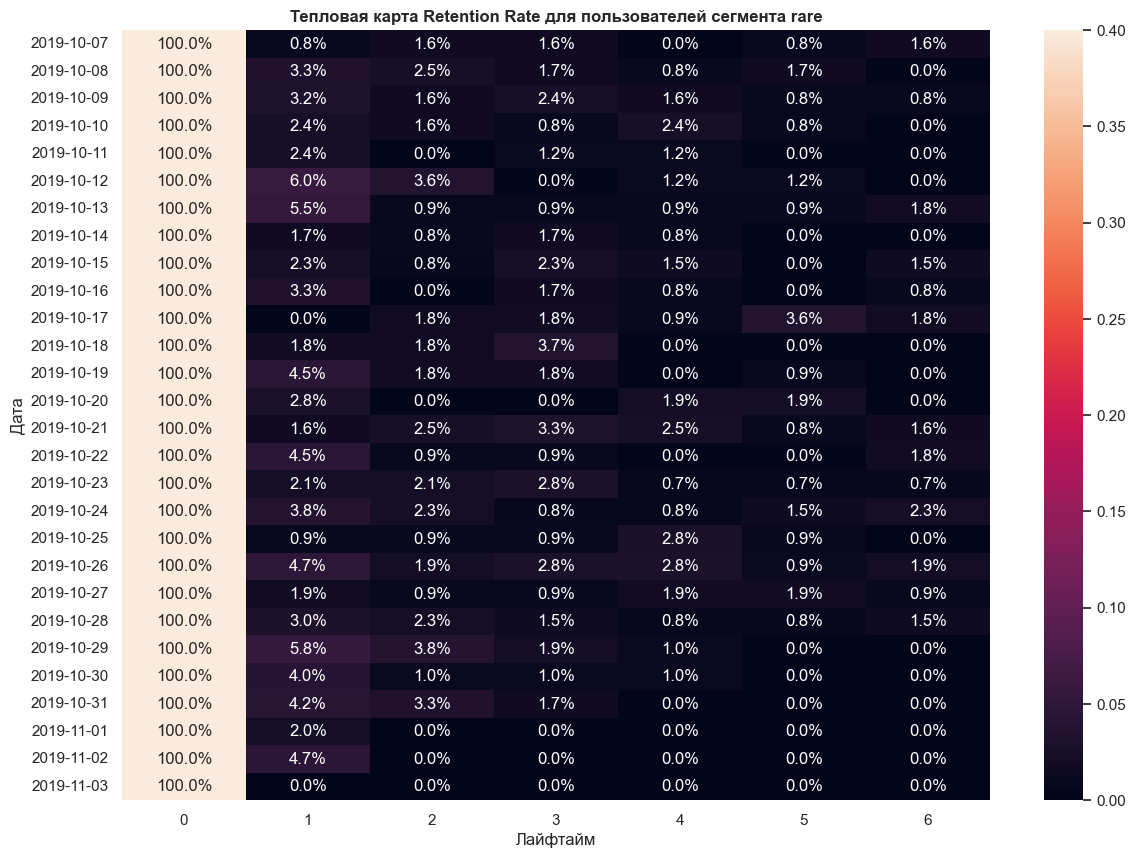

In [69]:
retention_rate_heatmap(profiles_rare, df_rare)

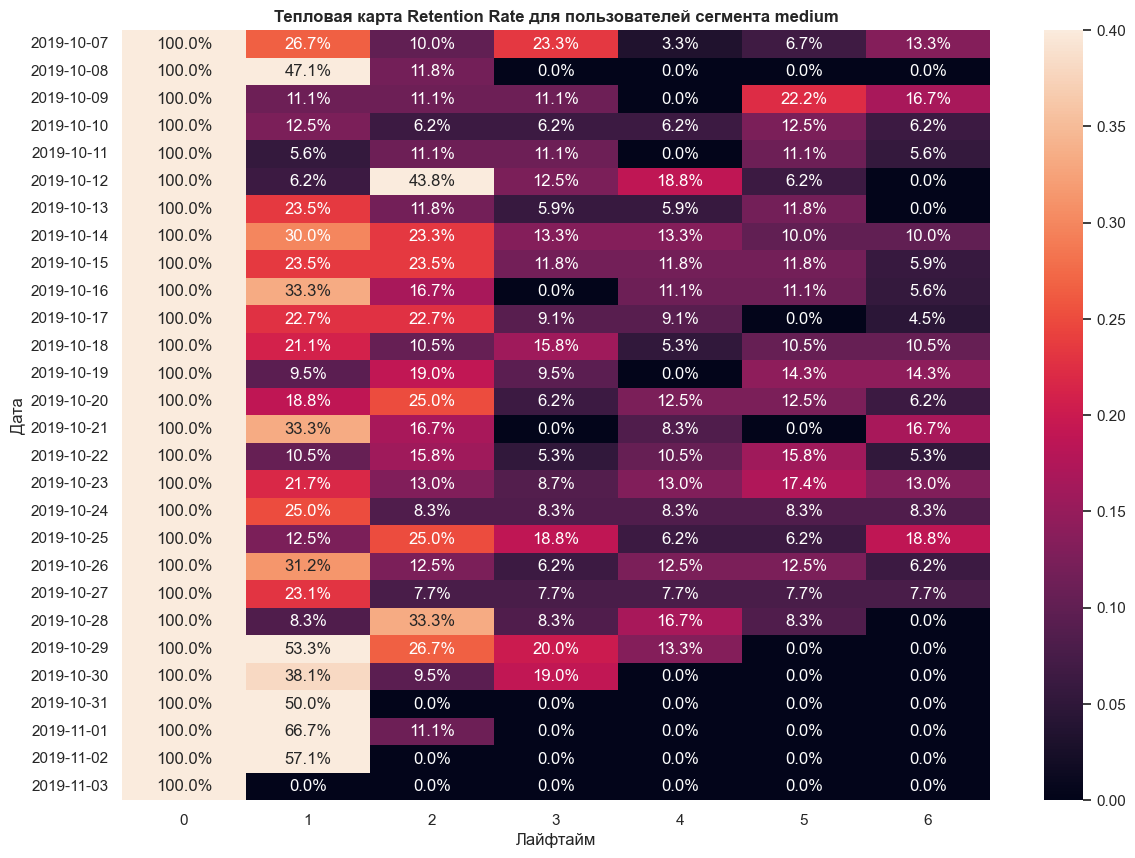

In [70]:
retention_rate_heatmap(profiles_medium, df_medium)

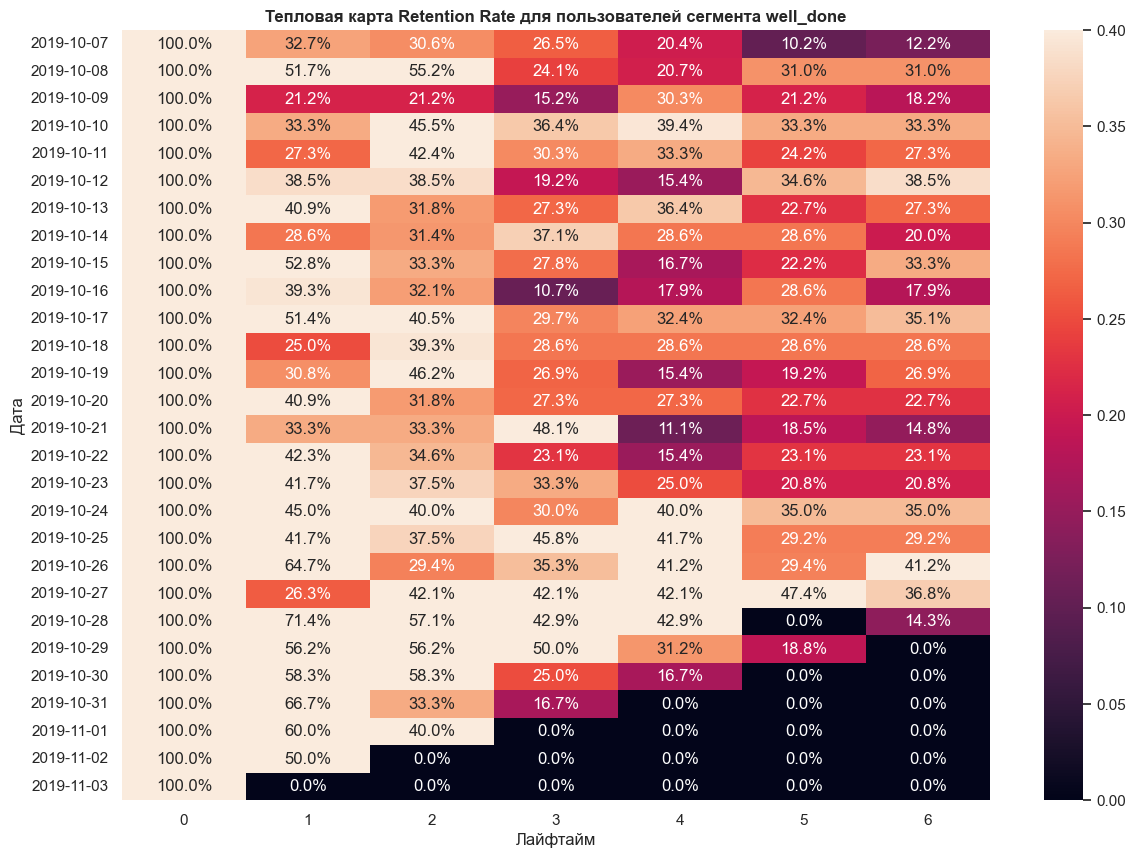

In [71]:
retention_rate_heatmap(profiles_well_done, df_well_done)

По тепловым картам видно, что у пользователей из сегмента `well_done` удержание в приложение гораздо выше, чем у пользователей остальных сегментов. 

### Конверсия по сегментированным пользователям в целевое действие

In [72]:
conversion_target(df_rare, profiles_rare, 'contacts_show')

4    16.83
Name: share, %, dtype: float64

In [73]:
conversion_target(df_medium, profiles_medium, 'contacts_show')

2    34.42
Name: share, %, dtype: float64

In [74]:
conversion_target(df_well_done, profiles_well_done, 'contacts_show')

2    43.95
Name: share, %, dtype: float64

Самая высокая конверсия у пользователей из сегмента well_done - `43.95%`, что превышает конверсию пользователей из сегмента `rare` почти в 2.5 раза.

## Вывод Шаг 4

Выделила `3 сегмента` пользователей по количеству сессий в приложении:
- `rare` (редкие) 3178 пользователей
- `medium` (средние) 653 пользователя
- `well_done` (частые) 462 пользователя

Среднее значение - `2 сессии` на пользователя. При этом медианное значение - `1`.

У пользователей из сегмента `well_done` удержание в приложение гораздо `выше`, чем у пользователей остальных сегментов.

Самая высокая `конверсия` у пользователей из сегмента `well_done` - `43.95%`, что превышает конверсию пользователей из сегмента `rare` почти в `2.5 раза`.

## Шаг 5. Проверка статистических гипотез

In [75]:
def conversion_target_source(df, profiles, target, source):
    '''
    Функция, которая считает конверсию пользователей в указанное событие с указанным источником перехода в приложение
    '''
    events = df.query('event_name == @target') \
                            .groupby(['event_name', 'source']) \
                            .agg({'event_name': 'count',
                                 'user_id': 'nunique'}) \
                            .rename(columns={'event_name':'all_users',
                                            'user_id': 'uniq_users'})

    events['share'] = events['uniq_users'] / len(profiles)
    events['share, %'] = round(events['uniq_users'] / len(profiles) * 100, 2)

    return events, events.query('event_name == @target & source == @source')['share, %'][0]

In [76]:
def conversion_target_segment(df, profiles, target, segment):
    '''
    Функция, которая считает конверсию пользователей в указанное событие из указанного сегмента
    '''
    events = df.query('event_name == @target') \
                            .groupby(['event_name', 'segment']) \
                            .agg({'event_name': 'count',
                                 'user_id': 'nunique'}) \
                            .rename(columns={'event_name':'all_users',
                                            'user_id': 'uniq_users'})

    events['share'] = events['uniq_users'] / len(profiles)
    events['share, %'] = round(events['uniq_users'] / len(profiles) * 100, 2)

    return events, events.query('event_name == @target & segment == @segment')['share, %'][0]

In [77]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)

    if (p_value < alpha): 
        print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия в выборках')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')

### Конверсия в целевое действие у пользователей, пришедших из yandex, отличается от пользователей, пришедших из google

Нулевая гипотеза `H₀`:
Пользователи из yandex и google имеют одинаковую конверсию в просмотры контактов.

Альтернативная гипотеза `H₁`:
Пользователи из yandex и google имеют разную конверсию в просмотры контактов.

Разделю пользователей на две группы: из yandex и из google, чтобы не было пересечений.

#### ztest

In [78]:
profiles_yandex = profiles.query('source == "yandex"')
profiles_google = profiles.query('source == "google"')

In [79]:
yandex_target_uniq_users = conversion_target_source(new_df, profiles_yandex, 'contacts_show', 'yandex')[0] \
                                    .query('source == "yandex"')['uniq_users'][0]
yandex_target_uniq_users

478

In [80]:
google_target_uniq_users = conversion_target_source(new_df, profiles_yandex, 'contacts_show', 'google')[0] \
                                    .query('source == "google"')['uniq_users'][0]
google_target_uniq_users

275

In [81]:
conversion_target_source(new_df, profiles_yandex, 'contacts_show', 'yandex')[0]

all_users  uniq_users     share  share, %
event_name    source                                           
contacts_show google       1395         275  0.142192     14.22
              other        1007         228  0.117890     11.79
              yandex       1979         478  0.247156     24.72

In [82]:
conversion_target_source(new_df, profiles_yandex, 'contacts_show', 'yandex')[1]

24.72

In [83]:
conversion_target_source(new_df, profiles_google, 'contacts_show', 'google')[1]

24.36

In [84]:
z_test(yandex_target_uniq_users, google_target_uniq_users, len(profiles_yandex), len(profiles_google))

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


Пользователи из yandex и google имеют одинаковую конверсию в просмотры контактов.<br>
Дополнительно посчитала в цифрах: у гугл - 24.36%, у яндекс - 24.72%.

### Конверсия в целевое действие у пользователей с маленьким количеством сессий и большим количеством сессий отличается

Нулевая гипотеза `H₀`:
Пользователи с разным количеством сессий показывают одинаковую конверсию в просмотры контактов.

Альтернативная гипотеза `H₁`:
Пользователи с разным количеством сессий показывают разную конверсию в просмотры контактов.

Разделю пользователей на три группы: rare, medium и well_done, чтобы не было пересечений.

#### ztest

In [85]:
profiles_rare = profiles.query('segment == "rare"')
profiles_medium = profiles.query('segment == "medium"')
profiles_well_done = profiles.query('segment == "well_done"')

In [86]:
conversion_target_segment(new_df, profiles_rare, 'contacts_show', 'rare')[0]

all_users  uniq_users     share  share, %
event_name    segment                                             
contacts_show medium           605         159  0.050031      5.00
              rare            1599         535  0.168345     16.83
              well_done       2177         287  0.090308      9.03

In [87]:
conversion_target_segment(new_df, profiles_rare, 'contacts_show', 'rare')[1]

16.83

In [88]:
conversion_target_segment(new_df, profiles_medium, 'contacts_show', 'medium')[1]

34.42

In [89]:
conversion_target_segment(new_df, profiles_well_done, 'contacts_show', 'well_done')[1]

43.95

In [90]:
rare_target_uniq_users = conversion_target_segment(new_df, profiles_rare, 'contacts_show', 'rare')[0] \
                                    .query('segment == "rare"')['uniq_users'][0]
rare_target_uniq_users

535

In [91]:
medium_target_uniq_users = conversion_target_segment(new_df, profiles_medium, 'contacts_show', 'medium')[0] \
                                    .query('segment == "medium"')['uniq_users'][0]
medium_target_uniq_users

159

In [92]:
well_done_target_uniq_users = conversion_target_segment(new_df, profiles_medium, 'contacts_show', 'well_done')[0] \
                                    .query('segment == "well_done"')['uniq_users'][0]
well_done_target_uniq_users

287

In [93]:
z_test(rare_target_uniq_users, medium_target_uniq_users, len(profiles_rare), len(profiles_medium))

p-значение:  0.0
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия в выборках


In [94]:
z_test(rare_target_uniq_users, well_done_target_uniq_users, len(profiles_rare), len(profiles_well_done))

p-значение:  0.0
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия в выборках


In [95]:
z_test(medium_target_uniq_users, well_done_target_uniq_users, len(profiles_medium), len(profiles_well_done))

p-значение:  0.0013664260909620474
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия в выборках


Пользователи с наибольшим количеством сессий показывают наибольшую конверсию в просмотры контактов по сравнению с пользователями из других сегментов.<br>
Между всеми сегментами - статистически значимые различия.<br>
Дополнительно посчитала в цифрах: у rare - 16.83%, у medium - 34.42%, у well_done - 43.95%.

## Вывод Шаг 5

Проверены две гипотезы. Получены следующие выводы:
- Пользователи из yandex и google имеют одинаковую конверсию в просмотры контактов.
- Пользователи с наибольшим количеством сессий показывают наибольшую конверсию в просмотры контактов по сравнению с пользователями из других сегментов.

# Общий вывод и рекомендации

<i>Выводы:</i>

Всего пользователей - `4293`. В среднем на пользователя приходится `17 событий`.

Первое посещение - `2019-10-07 00:00:00`. Последнее посещение - `2019-11-03 23:58:13`. 
Самое популярное событие - `tips_show`. 
Самый популярный источник перехода в приложение - `yandex`.

На протяжении всего периода дни различаются по удержанию пользователей. 
Самый лучший день по удержанию - `17.10.2019`. 
Можно предположить, что в этот день проводилась хорошая рекламная кампания.

Самый высокий показатель удержания пользователей у тех, кто пришел из `google`. 
При этом 45% пользователей установили приложение из yandex, 26% - из google и 29% - из других источников.

До целевого действия `contacts_show` доходят `22.85%`, дальнейший путь пользователя может продолжаться не в приложении, звонки могут исходить и вне. Так что конечный пункт считаю показом контактов продавца.

По рекомендованным объявлениям `tips_click` кликает `7.5%` пользователей.

Выделила `3 сегмента` пользователей по количеству сессий в приложении:

- `rare` (редкие) 3178 пользователей
- `medium` (средние) 653 пользователя
- `well_done` (частые) 462 пользователя

У пользователей из сегмента `well_done` удержание в приложение гораздо выше, чем у пользователей остальных сегментов.

Самая высокая конверсия у пользователей из сегмента `well_done` - `43.95%`, что превышает конверсию пользователей из сегмента rare почти в `2.5 раза`.


Проверены две гипотезы. Получены следующие выводы:

- Пользователи из yandex и google имеют одинаковую конверсию в просмотры контактов.
- Пользователи с наибольшим количеством сессий показывают наибольшую конверсию в просмотры контактов по сравнению с пользователями из других сегментов.

<i>Рекомендации:</i>

1) Посмотреть на рекламу, которая была 17 октября. Она была удачная.<br>
2) Самый высокий показатель удержания пользователей у тех, кто пришел из google. При этом самый популярный источник перехода - yandex. Возможно, стоит вложить больше в рекламу google. <br>
3) Улучшить рекомендованные объявления. Конверсия в клик достаточно низкая.<br>
4) Чем чаще пользователь заходит в приложение, тем чаще совершает целевое действие. Стоит подумать над периодической рассылкой пуш-уведомлений, чтобы пользователи не забывали заходить.<br>

<i>Недостатки:</i>
- события contacts_show и show_contacts нужно объединить в одно.
- события search_1 - search_7 неизвестны.